<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

nlp = spacy.load('en_core_web_md')

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests
import re

df = pd.read_csv('/Users/petergeraghty/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv')
df.drop(columns='Unnamed: 0', inplace=True)

def text_extract(html):
    
    "cleans up html docs, returns text from html format"

    soup = BeautifulSoup(html, 'html.parser')
    alpha = soup.get_text()
    alpha = re.sub('\\\\n', ' ', alpha)
    alpha = re.sub('\\\\x..\\\\', '', alpha)
    alpha = re.sub('x..\\\\x..', '', alpha)
    alpha = re.sub('b"', '', alpha)
    alpha = re.sub("\\'", "", alpha)
    alpha = re.sub("/", ' or ', alpha)
    alpha = re.sub('"', '', alpha)
    alpha = re.sub('[^a-zA-Z ]', '', alpha)
    

    return(alpha)

df['description'] = df['description'].apply(lambda x: text_extract(x))

## 2) Use Spacy to tokenize the listings 

In [3]:
def tokenize(document):
    """
    Takes a doc and returns a list of tokens in the form of lemmas.
    Stop words and punctuation are filtered out. 
    """
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

corpus = df['description'].apply(lambda x: tokenize(x))

In [4]:
df['tokens'] = df['description'].apply(lambda x: tokenize(x))

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [5]:
count_vectorizer = CountVectorizer(stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"], min_df=.05)

corpus = df['description']

X2 = count_vectorizer.fit_transform(corpus)

In [6]:
gamma = count_vectorizer.get_feature_names()
delta = X2.toarray()

df_words_vectors = pd.DataFrame(data = delta, columns=gamma)

In [7]:
df_words_vectors.head()

,abilities,ability,able,academic,access,accommodation,accuracy,achieve,acquisition,across,...,worlds,would,write,writing,written,year,years,york,youll,youre
0,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,2,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df_words_total = pd.DataFrame(columns=['word', 'count'], index=[x for x in range(len(df_words_vectors.columns))])

for i, x in enumerate(df_words_vectors.columns):
    y = df_words_vectors[x].sum()
    df_words_total.iloc[i] = [x, y]

In [9]:
df_words_total['pct_total'] = [x/df_words_total['count'].sum() for x in df_words_total['count']]

## 4) Visualize the most common word counts

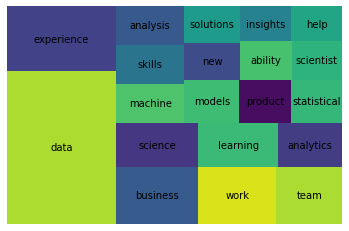

In [10]:
##### Your Code Here #####
import squarify
import matplotlib.pyplot as plt

wc_top = df_words_total.sort_values(by='pct_total', ascending=False)
wc_top20 = wc_top.iloc[:20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=1)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"], min_df=.05)
doc = ['CareAdvisors is a technology company that helps patients get access to healthcare and social service benefits they need by automating the manual enrollment role taken on by hospitals. Many patients who receive care at hospitals are eligible for Medicaid and other social service benefits, but some have barriers to enroll or re-enroll in their benefits. Using a modern technology stack focused on automation, CareAdvisorswe remove those barriers so that patients can get access to the benefits they need, and lift the financial burden hospitals endure when providing care to patients.']

X3 = tfidf.fit_transform(df['description'])
X4 = tfidf.transform(doc)

gamma = tfidf.get_feature_names()

delta = X4.toarray()

df_words_vectors = pd.DataFrame(data = X3.toarray(), columns=gamma)
df_sample_vectors = pd.DataFrame(data = delta, columns=gamma)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [12]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

nn = NearestNeighbors(n_neighbors=5).fit(df_words_vectors)


In [13]:
nn.kneighbors(df_sample_vectors)

(array([[1.2636369 , 1.28191075, 1.28869203, 1.29596742, 1.29757976]]),
 array([[345, 349, 256, 425, 323]]))

In [14]:
delta = []
beta = np.array(df_sample_vectors.iloc[0]).reshape(1, -1)


for x in df_words_vectors.iterrows():
    alpha = np.array(df_words_vectors.iloc[x]).reshape(1, -1)
    gamma = cosine_similarity(beta, alpha)
    delta.append(gamma)

In [15]:
df['similarity'] = delta

In [16]:
df['category'] = 0
df.loc[df['similarity'] != 0, 'category'] = 1

In [17]:
import scattertext as st

df1 = st.SampleCorpora.ConventionData2012.get_data().assign(
    parse=lambda df: df.text.apply(st.whitespace_nlp_with_sentences)
)

corpus = st.CorpusFromParsedDocuments(
    df1, category_col='party', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

html = st.produce_scattertext_explorer(
    corpus,
    category='democrat', category_name='Democratic', not_category_name='Republican',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['speaker'],
    transform=st.Scalers.dense_rank
)
open('./demo_compact.html', 'w').write(html)

1650796

In [18]:
df.head()

,description,title,tokens,similarity,category
0,Job Requirements Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ...",[[0.0]],0
1,bJob Description As a Data Scientist you wil...,Data Scientist I,"[bJob, Description, , Data, Scientist, , help,...",[[0.0]],0
2,bAs a Data Scientist you will be working on co...,Data Scientist - Entry Level,"[bAs, Data, Scientist, work, consult, business...",[[0.0]],0
3,b a monthContractUnder the general supervisi...,Data Scientist,"[b, , monthcontractunder, general, supervision...",[[0.0]],0
4,bLocation USA multiple locations years of An...,Data Scientist,"[bLocation, USA, , multiple, location, , year,...",[[0.0]],0


In [19]:
df.loc[df['category'] == 0, 'category'] = 'colder'
df.loc[df['category'] == 1, 'category'] = 'warmer'

In [20]:
df = df.assign(
    parse=lambda df: df.description.apply(st.whitespace_nlp_with_sentences)
)

In [21]:
corpus = st.CorpusFromParsedDocuments(
    df, category_col='category', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

html = st.produce_scattertext_explorer(
    corpus,
    category='colder', category_name='colder', not_category_name='warmer',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['title']
)
open('./demo_compact.html', 'w').write(html)

2387599

In [22]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [23]:
df.head()

,description,title,tokens,similarity,category,parse
0,Job Requirements Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ...",[[0.0]],colder,"(job, requirements, conceptual, understanding,..."
1,bJob Description As a Data Scientist you wil...,Data Scientist I,"[bJob, Description, , Data, Scientist, , help,...",[[0.0]],colder,"(bjob, description, as, a, data, scientist, yo..."
2,bAs a Data Scientist you will be working on co...,Data Scientist - Entry Level,"[bAs, Data, Scientist, work, consult, business...",[[0.0]],colder,"(bas, a, data, scientist, you, will, be, worki..."
3,b a monthContractUnder the general supervisi...,Data Scientist,"[b, , monthcontractunder, general, supervision...",[[0.0]],colder,"(b, a, monthcontractunder, the, general, super..."
4,bLocation USA multiple locations years of An...,Data Scientist,"[bLocation, USA, , multiple, location, , year,...",[[0.0]],colder,"(blocation, usa, multiple, locations, years, o..."


In [24]:
df_vector = df.drop(columns=['tokens', 'similarity', 'category', 'parse'])

In [25]:
def embedding(doc):
    "performs word embeddings for documents"
    doct = nlp(doc)
    vector = doct.vector
    
    return(vector)

In [26]:
alpha = ['entry', 'junior', 'intern', 'internship', 'jr.']
for x in df['title'].value_counts().index:
    z = x.strip(')')
    z = z.replace('(', ' ')
    z = z.replace('/', ' ')
    z = z.replace(',', '')
    z = z.lower().split()
    for y in z:
        if y in alpha:
            df.loc[df['title']==x, 'title'] = 'Data Scientist Entry Level'

In [27]:
for x in range(len(df)):
    if df['title'][x] != 'Data Scientist':
        if df['title'][x] != 'Data Scientist Entry Level':
            df['title'][x] = 'Data Scientist'

In [28]:
count_vectorizer = CountVectorizer(stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"], min_df=.05)
df_gotcha = count_vectorizer.fit_transform(df['description'])
array_toadd = df_gotcha.toarray()

In [30]:
df.drop(columns = ['tokens', 'similarity', 'category', 'parse'], inplace=True)

In [31]:
f_names = count_vectorizer.get_feature_names()
dftemp = pd.DataFrame(data = array_toadd, columns=f_names)

In [32]:
df_final = pd.concat([df, dftemp], axis=1)

In [33]:
df_final['title'].value_counts()

Data Scientist                364
Data Scientist Entry Level     62
Name: title, dtype: int64

In [34]:
wc_non_entry = df_final.loc[df['title'] == 'Data Scientist']
wc_non_entry.drop(columns = ['description'], inplace=True)
wc_entry = df_final.loc[df['title'] == 'Data Scientist Entry Level']
wc_entry.drop(columns = ['description'], inplace=True)

In [35]:
entry = pd.DataFrame(columns = ['word', 'count'], index = [x for x in range(len(f_names))])
non_entry = pd.DataFrame(columns = ['word', 'count'], index = [x for x in range(len(f_names))])
entry['word'] = f_names
non_entry['word'] = f_names
for i, x in enumerate(f_names):
    if x == 'description':
        a = 1
    else:
        entry.loc[entry['word'] == x, 'count'] = wc_entry[x].sum()
for i, x in enumerate(f_names):
    if x == 'description':
        a = 1
    else:
        non_entry.loc[non_entry['word'] == x, 'count'] = wc_non_entry[x].sum()

In [44]:
entry['freq'] = [x/entry['count'].sum() for x in entry['count']]
non_entry['freq'] = [x/non_entry['count'].sum() for x in entry['count']]

In [54]:
entry['dif'] = abs(entry['freq'] - non_entry['freq'])
ans = entry.sort_values(by='dif', ascending=False)
words = ans.iloc[0:20]

In [45]:
entry_top20 = entry.sort_values(by='count', ascending=False)
nonentry_top20 = non_entry.sort_values(by='count', ascending=False)
entry_top20 = entry_top20.iloc[0:20]
nonentry_top20 = nonentry_top20.iloc[0:20]

,word,count,freq
216,data,462,0.039941
343,experience,168,0.014524
975,work,147,0.012709
518,learning,131,0.011325
106,business,121,0.010461
804,science,112,0.009683
895,team,106,0.009164
836,skills,103,0.008905
35,analysis,96,0.008299
543,machine,86,0.007435


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 